In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist

In [2]:
fileset = {} #dictionary of lists of directories

sig_dir = '/ceph/cms/store/user/aaportel/B-Parking/rechits_v2/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300/'
fileset['sample'] = [sig_dir + f'BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_{str(i).zfill(7)}.root' for i in range(328)]

f = uproot.open(fileset['sample'][0]) #first path in dictionary
raw_data = f['MuonSystem'].arrays(library = 'ak')

In [4]:
print(fileset['sample'][0])

/ceph/cms/store/user/aaportel/B-Parking/rechits_v2/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_0000000.root


In [ ]:
raw_data.fields

In [13]:
raw_data.cscRechitsX
# each row is an event
# stuff in row is data, each number is the data for a hit caused by the event

<Array [[], [], ..., [-140, -139, ..., -319, -331]] type='4768 * var * float32'>

In [14]:
ak.flatten(raw_data.cscRechitsX)

<Array [-161, -159, -158, -155, ..., -325, -319, -331] type='149388 * float32'>

In [17]:
h = hist.Hist.new.Regular(10, -800, 800, name="x").Double()
h.fill(ak.flatten(raw_data.cscRechitsX))

Hist(Regular(10, -800, 800, name='x'), storage=Double()) # Sum: 149388.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f28371e6ad0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

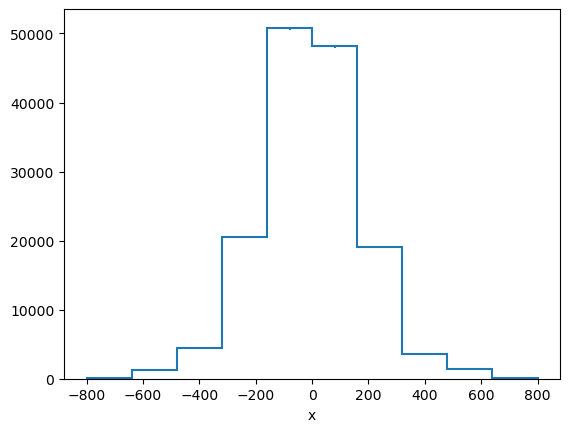

In [18]:
hep.histplot(h)